In [698]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3

In [699]:
conn = sqlite3.connect('../db.sqlite3')
cur = conn.cursor()

query = '''
SELECT * 
FROM base_usuario
'''

df = pd.read_sql(query, con = conn)

cur.close()
conn.close()

df.head()

,id,password,last_login,ip_usuario,primeiro_nome,sobrenome,email,username,telefone,CEP,...,status,esportes_praticados,fav_esport,altura,idade,peso,genero,imagem,is_superuser,is_staff
0,1,!S8xJn2qAtobmdnODUBtN5i6dBwKwhvanBTUH2eGe,None,8.73.101.97,Luiz Gustavo,Moreira,emillynovaes@uol.com.br,halmeida,(051) 6105 1464,23428-266,...,Online,"Handebol, Vôlei, Basquete",Handebol,174,19,82.0,Masculino,https://www.lorempixel.com/793/442,0,0
1,2,!IoU7eUe3BVwUie1yC0ytsojzA6VoHZvXyYzCUbdp,None,181.74.182.28,Lavínia,Alves,ferreiraluiz-otavio@hotmail.com,ferreiracatarina,+55 51 9188 5972,26772532,...,Offline,"Futebol, Basquete",Basquete,164,22,56.0,Masculino,https://www.lorempixel.com/320/749,0,0
2,3,!H4k79l3THKB6uMfwT7tIHzhwwAECQU10lGItIGR0,None,141.175.80.149,Fernando,Rocha,da-costayago@cavalcanti.br,vda-costa,41 5997 3123,42529-502,...,Online,Outros,Vôlei,161,18,54.0,Feminino,https://placeimg.com/129/780/any,0,0
3,4,!yDyKF800DtPOo3tNJjzqLQoCzOPTi4LIQrgj9gV4,None,60.82.193.202,Sophie,Santos,ana-julia47@da.com,sabrinasilva,+55 81 5598 3119,62923-755,...,Buscando partidas,"Futsal, Futebol, Basquete, Outros",Futsal,160,18,50.0,Feminino,https://placekitten.com/947/310,0,0
4,5,!osS6GjzqN783ApUfshnxAXIEetzotJ81bLnXJW90,None,217.189.231.36,Anthony,Monteiro,melissa53@ig.com.br,henrique89,(084) 0063 3559,67011-709,...,Offline,"Futsal, Futebol, Vôlei, Basquete",Futebol,164,20,52.0,Masculino,https://www.lorempixel.com/34/947,0,0


In [700]:
df_ = df[['fav_esport', 'genero']]
gb = df_.groupby(['genero']).count()

total = gb["fav_esport"].sum()


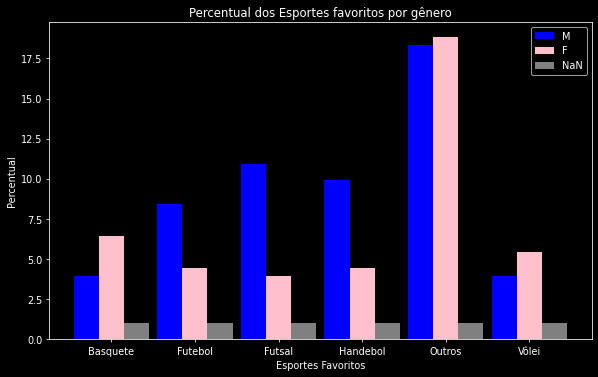

In [701]:
m = df_["genero"] == "Masculino"
f = df_["genero"] == "Feminino"
o = df_["genero"] == "Prefiro não responder"

dm = df_[m]       #genero masculino
gm = dm.groupby(by = "fav_esport").count()

dfe = df_[f] #genreo feminino
gf = dfe.groupby(by = "fav_esport").count()

do = df_[o] #genero pfn resp
go = do.groupby(by = "fav_esport").count()


total_m = dm["genero"].count()
total_f = dfe["genero"].count()

gf = gf/total * 100
gm = gm/total * 100
go = go/total * 100


e = ["Basquete", "Futebol", "Futsal", "Handebol", "Outros", "Vôlei"]


x = np.arange(6)
width = 0.3

plt.subplots(figsize=(10,6), dpi=70)
plt.bar (x - 0.3, gm["genero"].tolist(), width, color="blue")
plt.bar (x , gf["genero"].tolist(), width, color="pink")
plt.bar (x + 0.3, go["genero"].tolist(), width, color="gray")
plt.xticks(x,e)

plt.title("Percentual dos Esportes favoritos por gênero")
plt.xlabel("Esportes Favoritos")
plt.ylabel("Percentual")
plt.legend(["M", "F", "NaN"])
plt.show()



,genero
fav_esport,
Basquete,13
Futebol,9
Futsal,8
Handebol,9
Outros,38
Vôlei,11


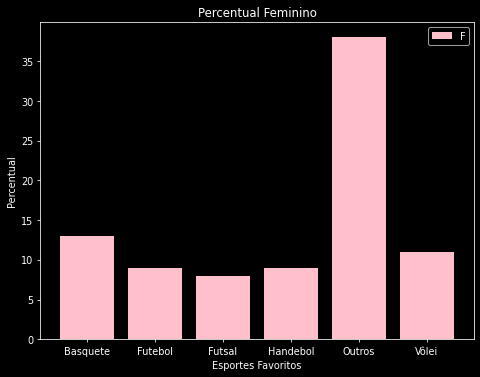

In [702]:
x = np.arange(6)
width = 0.8
dfe = df_[f] #genreo feminino
gf = dfe.groupby(by = "fav_esport").count()
#gf = gf/total_f * 100

plt.subplots(figsize=(8,6), dpi=70)
plt.bar (x , gf["genero"].tolist(), width, color="pink")

plt.xticks(x,e)
plt.title("Percentual Feminino")
plt.xlabel("Esportes Favoritos")
plt.ylabel("Percentual")
plt.legend(["F"])

gf

,genero
fav_esport,
Basquete,7.142857
Futebol,15.178571
Futsal,19.642857
Handebol,17.857143
Outros,33.035714
Vôlei,7.142857


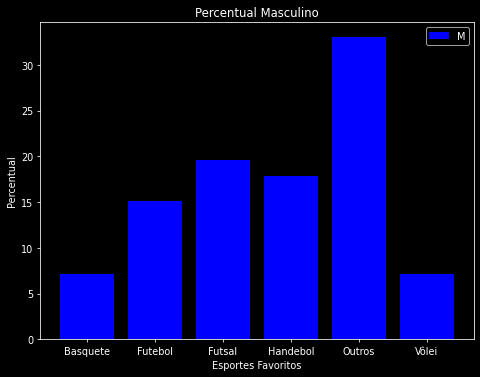

In [703]:
x = np.arange(6)
width = 0.8

dm = df_[m]       #genero masculino
gm = dm.groupby(by = "fav_esport").count()
gm = gm/total_m * 100

plt.subplots(figsize=(8,6), dpi=70)
plt.bar (x , gm["genero"].tolist(), width, color="blue")
plt.xticks(x,e)
plt.title("Percentual Masculino")
plt.xlabel("Esportes Favoritos")
plt.ylabel("Percentual")
plt.legend(["M"])

gm

In [704]:
df_ = df[['genero', 'fav_esport']]

sport_p = [] #esportes praticados

#df_["esportes_praticados"] = df_["esportes_praticados"].apply(lambda ex: sport_p.extend(ex.split(", ")))

jk = pd.DataFrame(data= [], index= [] , columns= ["Esporte"])
jk["Esporte"] = df_['fav_esport']


futebol = jk[jk["Esporte"] == "Futebol"].count()/total*100
futsal = jk[jk["Esporte"] == "Futsal"].count()/total*100
volei = jk[jk["Esporte"] == "Vôlei"].count()/total*100
basquete = jk[jk["Esporte"] == "Basquete"].count()/total*100
outros = jk[jk["Esporte"] == "Outros"].count()/total*100
handebol = jk[jk["Esporte"] == "Handebol"].count()/total*100

list_esp = [futebol["Esporte"], futsal["Esporte"], volei["Esporte"], basquete["Esporte"], handebol["Esporte"], outros["Esporte"]]

[12.871287128712872,
 14.85148514851485,
 9.405940594059405,
 10.396039603960396,
 14.356435643564355,
 38.11881188118812]

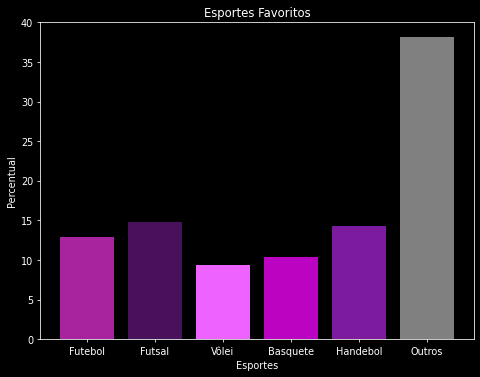

In [705]:
x = np.arange(6)
width = 0.8

plt.subplots(figsize=(8,6), dpi=70)
plt.bar (x , list_esp, width, color=["#A8249F","#49105C","#EE63FF", "#BB04C2","#7D1B9E", "gray"])
plt.xticks(x,["Futebol", "Futsal", "Vôlei", "Basquete","Handebol", "Outros"])
plt.title("Esportes Favoritos")
plt.xlabel("Esportes")
plt.ylabel("Percentual")

list_esp